In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./서울특별시 일반음식점 인허가 정보.csv", encoding='cp949')
print(df.columns)

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수',
       '영업장주변구분명', '등급구분명', '급수시설구분명', '총인원', '본사종업원수', '공장사무직종업원수',
       '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모',
       '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')


In [3]:
df = df[['도로명주소' , '사업장명', '업태구분명']]
df.head()

,도로명주소,사업장명,업태구분명
0,NaN,일식동경,일식
1,서울특별시 종로구 삼일대로 382 (관철동),상해,분식
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),미쿠,일식
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),여름엔빙수겨울엔떡국,한식
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),카페디퍼,기타


In [4]:
df.isna().sum()

도로명주소    1698
사업장명        1
업태구분명      11
dtype: int64

In [5]:
df = df.dropna()
df.head()

,도로명주소,사업장명,업태구분명
1,서울특별시 종로구 삼일대로 382 (관철동),상해,분식
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),미쿠,일식
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),여름엔빙수겨울엔떡국,한식
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),카페디퍼,기타
5,서울특별시 동대문구 난계로30길 28-7 1층 (신설동),메이크데이(MakeDay),기타


In [6]:
df["업태구분명"].value_counts().sort_index()

감성주점                228
경양식                9339
기타                17963
김밥(도시락)             586
까페                 2092
냉면집                 105
라이브카페               190
복어취급                 51
분식                 9096
뷔페식                 461
식육(숯불구이)            887
외국음식전문점(인도태국등)     1383
이동조리                  7
일식                 6189
전통찻집                 51
정종/대포집/소주방         2235
중국식                4575
출장조리                100
커피숍                   3
키즈카페                 66
탕류(보신용)             144
통닭(치킨)             2531
패밀리레스트랑             174
패스트푸드               705
한식                52562
호프/통닭             10407
회집                  279
횟집                  297
Name: 업태구분명, dtype: int64

In [7]:
separated_dict = {'경양식':'양식','뷔페식':'양식','패밀리레스트랑':'양식',
'회집':'해산물','횟집':'해산물','복어취급':'해산물',
'분식':'분식','냉면집':'분식','김밥(도시락)':'분식',
'통닭(치킨)':'치킨','호프/통닭':'치킨',
'한식':'한식','탕류(보신용)':'한식',
'커피숍':'카페','까페':'카페','키즈카페':'카페','라이브카페':'카페','전통찻집':'카페','기타':'카페',
'정종/대포집/소주방':'술집','감성주점':'술집',
'식육(숯불구이)':'고기',
'중국식':'중식',
'외국음식전문점(인도태국등)':'외국음식',
'출장조리':None, '이동조리':None}

for i, j in separated_dict.items():
    df = df.replace(i, j)

df = df.dropna()
df.head()

,도로명주소,사업장명,업태구분명
1,서울특별시 종로구 삼일대로 382 (관철동),상해,분식
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),미쿠,일식
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),여름엔빙수겨울엔떡국,한식
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),카페디퍼,카페
5,서울특별시 동대문구 난계로30길 28-7 1층 (신설동),메이크데이(MakeDay),카페


In [8]:
df['도로명주소'] = [' '.join(i.split()[:4]) for i in df['도로명주소']]
df['도로명주소']

1             서울특별시 종로구 삼일대로 382
2         서울특별시 관악구 신림로59길 15-13
3           서울특별시 구로구 구로동로22길 21
4            서울특별시 강남구 삼성로85길 33
5         서울특별시 동대문구 난계로30길 28-7
                   ...          
124411          서울특별시 동작구 대림로 55
124412          서울특별시 중구 다산로 137
124413       서울특별시 광진구 동일로24길 28
124414          서울특별시 강동구 상암로 50
124415           서울특별시 종로구 종로 19
Name: 도로명주소, Length: 122599, dtype: object

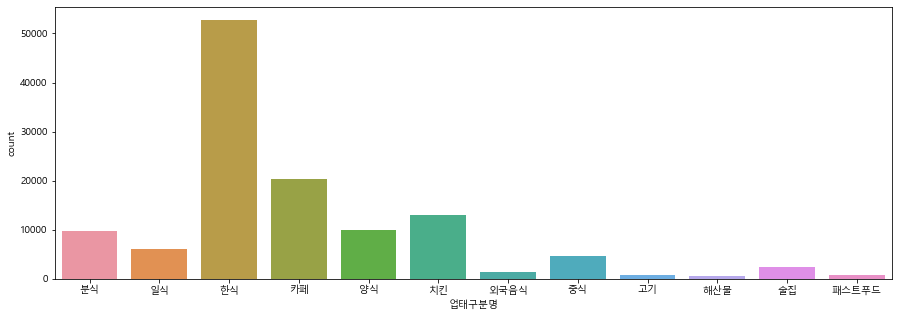

In [9]:
plt.figure(figsize=(15,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['업태구분명'])
plt.show()

In [10]:
# 자치구
print(f'''자치구 목록
{', '.join([i for i in set([i.split()[1] for i in df['도로명주소']])])}
원하시는 자치구를 입력해주세요''')
gu = input()
print(f'"{gu}"를 선택하셨습니다.')

# 메뉴
print(f'''메뉴 목록
모두, {', '.join([i for i in df['업태구분명'].unique()])}
원하시는 메뉴를 입력해주세요.''')
menu = input()
print(f'"{menu}"를 선택하셨습니다.')

if menu == '모두':
    Keyword = df[df['도로명주소'].str.contains(gu)][['도로명주소','사업장명']].reset_index(drop=True)
    Keyword = Keyword['도로명주소'] + ' ' + Keyword['사업장명']
else:
    Keyword = df[df['도로명주소'].str.contains(gu)][df['업태구분명'] == menu][['도로명주소','사업장명']].reset_index(drop=True)
    Keyword = Keyword['도로명주소'] + ' ' + Keyword['사업장명']

Keyword

자치구 목록
강북구, 마포구, 양천구, 강서구, 동대문구, 강남구, 광진구, 서초구, 동작구, 금천구, 도봉구, 강동구, 관악구, 영등포구, 구로구, 성동구, 서대문구, 노원구, 중랑구, 중구, 종로구, 성북구, 용산구, 은평구, 송파구
원하시는 자치구를 입력해주세요
"강남구"를 선택하셨습니다.
메뉴 목록
모두, 분식, 일식, 한식, 카페, 양식, 치킨, 외국음식, 중식, 고기, 해산물, 술집, 패스트푸드
원하시는 메뉴를 입력해주세요.
"카페"를 선택하셨습니다.


0                            서울특별시 강남구 삼성로85길 33 카페디퍼
1                       서울특별시 강남구 남부순환로 2753 롯데시네마 도곡
2                          서울특별시 강남구 도산대로1길 10 이소젠 네타
3       서울특별시 강남구 언주로150길 35 카페 베이직먼트(cafe basicment)
4                      서울특별시 강남구 봉은사로 502 클로리스 삼성중앙역점
                            ...                      
1702                    서울특별시 강남구 학동로 330 서오릉피자 강남논현점
1703            서울특별시 강남구 압구정로29길 71 핑크레이디(Pink Lady)
1704                         서울특별시 강남구 테헤란로83길 41 어게인
1705                        서울특별시 강남구 개포로 264 꽈알라 보틀숍
1706                        서울특별시 강남구 언주로172길 53 릿라운지
Length: 1707, dtype: object

In [11]:
Keyword.to_csv('Keyword.csv', index=False)